# Tugas Besar Probabilitas dan Statistika
### Analisis Data dan Tes Hipotesis

# Import Necessary Libraries

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Import Dataset

In [38]:
df = pd.read_csv("../data/anggur.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,5.90,0.4451,0.1813,2.049401,0.070574,16.593818,42.27,0.9982,3.27,0.71,8.64,7
1,8.40,0.5768,0.2099,3.109590,0.101681,22.555519,16.01,0.9960,3.35,0.57,10.03,8
2,7.54,0.5918,0.3248,3.673744,0.072416,9.316866,35.52,0.9990,3.31,0.64,9.23,8
3,5.39,0.4201,0.3131,3.371815,0.072755,18.212300,41.97,0.9945,3.34,0.55,14.07,9
4,6.51,0.5675,0.1940,4.404723,0.066379,9.360591,46.27,0.9925,3.27,0.45,11.49,8
...,...,...,...,...,...,...,...,...,...,...,...,...
995,7.96,0.6046,0.2662,1.592048,0.057555,14.892445,44.61,0.9975,3.35,0.54,10.41,8
996,8.48,0.4080,0.2227,0.681955,0.051627,23.548965,25.83,0.9972,3.41,0.46,9.91,8
997,6.11,0.4841,0.3720,2.377267,0.042806,21.624585,48.75,0.9928,3.23,0.55,9.94,7
998,7.76,0.3590,0.3208,4.294486,0.098276,12.746186,44.53,0.9952,3.30,0.66,9.76,8


# Exploratory Data Analysis

## Descriptive Statistics

### Missing Values

In [39]:
missing_values = df.isnull().sum(axis=0)
nan_cols = missing_values[missing_values > 0]
print("Missing Data:", len(nan_cols))

Missing Data: 0


### Feature Information

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1000 non-null   float64
 1   volatile acidity      1000 non-null   float64
 2   citric acid           1000 non-null   float64
 3   residual sugar        1000 non-null   float64
 4   chlorides             1000 non-null   float64
 5   free sulfur dioxide   1000 non-null   float64
 6   total sulfur dioxide  1000 non-null   float64
 7   density               1000 non-null   float64
 8   pH                    1000 non-null   float64
 9   sulphates             1000 non-null   float64
 10  alcohol               1000 non-null   float64
 11  quality               1000 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 93.9 KB


Based on the information above, all features are of numeric type

### Statistical Summary

In [41]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,7.152530,0.520839,0.270517,2.567104,0.081195,14.907679,40.290150,0.995925,3.303610,0.598390,10.592280,7.958000
std,1.201598,0.095848,0.049098,0.987915,0.020111,4.888100,9.965767,0.002020,0.104875,0.100819,1.510706,0.902802
min,3.320000,0.139900,0.116700,0.032555,0.015122,0.194679,3.150000,0.988800,2.970000,0.290000,6.030000,5.000000
25%,6.377500,0.456100,0.237800,1.896330,0.066574,11.426717,33.785000,0.994600,3.230000,0.530000,9.560000,7.000000
50%,7.150000,0.524850,0.272200,2.519430,0.082167,14.860346,40.190000,0.996000,3.300000,0.595000,10.610000,8.000000
75%,8.000000,0.585375,0.302325,3.220873,0.095312,18.313098,47.022500,0.997200,3.370000,0.670000,11.622500,9.000000
max,11.490000,0.805100,0.409600,5.550755,0.140758,27.462525,69.960000,1.002600,3.710000,0.960000,15.020000,10.000000


### Unique Values

In [42]:
df.nunique()

fixed acidity            417
volatile acidity         879
citric acid              769
residual sugar          1000
chlorides               1000
free sulfur dioxide     1000
total sulfur dioxide     881
density                  107
pH                        61
sulphates                 60
alcohol                  490
quality                    6
dtype: int64

### Skewness

In [43]:
df.skew()

fixed acidity          -0.028879
volatile acidity       -0.197699
citric acid            -0.045576
residual sugar          0.132638
chlorides              -0.051319
free sulfur dioxide     0.007130
total sulfur dioxide   -0.024060
density                -0.076883
pH                      0.147673
sulphates               0.149199
alcohol                -0.018991
quality                -0.089054
dtype: float64

### Kurtosis

In [44]:
df.kurtosis()

fixed acidity          -0.019292
volatile acidity        0.161853
citric acid            -0.104679
residual sugar         -0.042980
chlorides              -0.246508
free sulfur dioxide    -0.364964
total sulfur dioxide    0.063950
density                 0.016366
pH                      0.080910
sulphates               0.064819
alcohol                -0.131732
quality                 0.108291
dtype: float64

### Quartiles and Interquartile Range

In [45]:
# Examine interquartile range
def iqr(data, col):
    print("===============================")
    print("Column:", col)
    # Determine IQR for column
    col_values = data[col].values
    q25, q75 = np.percentile(col_values, 25), np.percentile(col_values, 75)
    print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
    iqr = q75 - q25
    print('IQR: {}'.format(iqr))
    print()

    # Determine the cut off (IQR * 1.5)
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    print('Cut Off: {}'.format(cut_off))
    print('Lower bound: {}'.format(lower))
    print('Upper bound: {}'.format(upper))
    print("===============================")
    print()

In [46]:
for col in df.columns:
    iqr(df, col)

Column: fixed acidity
Quartile 25: 6.3774999999999995 | Quartile 75: 8.0
IQR: 1.6225000000000005

Cut Off: 2.4337500000000007
Lower bound: 3.9437499999999988
Upper bound: 10.43375

Column: volatile acidity
Quartile 25: 0.4561 | Quartile 75: 0.585375
IQR: 0.12927499999999997

Cut Off: 0.19391249999999996
Lower bound: 0.2621875
Upper bound: 0.7792874999999999

Column: citric acid
Quartile 25: 0.2378 | Quartile 75: 0.302325
IQR: 0.064525

Cut Off: 0.0967875
Lower bound: 0.1410125
Upper bound: 0.3991125

Column: residual sugar
Quartile 25: 1.896329943488683 | Quartile 75: 3.220873482829786
IQR: 1.3245435393411031

Cut Off: 1.9868153090116547
Lower bound: -0.09048536552297182
Upper bound: 5.2076887918414405

Column: chlorides
Quartile 25: 0.06657363190977357 | Quartile 75: 0.09531150148556258
IQR: 0.028737869575789013

Cut Off: 0.04310680436368352
Lower bound: 0.02346682754609005
Upper bound: 0.1384183058492461

Column: free sulfur dioxide
Quartile 25: 11.426716949457617 | Quartile 75: 18.3

## Univariate Analysis

### Distribution

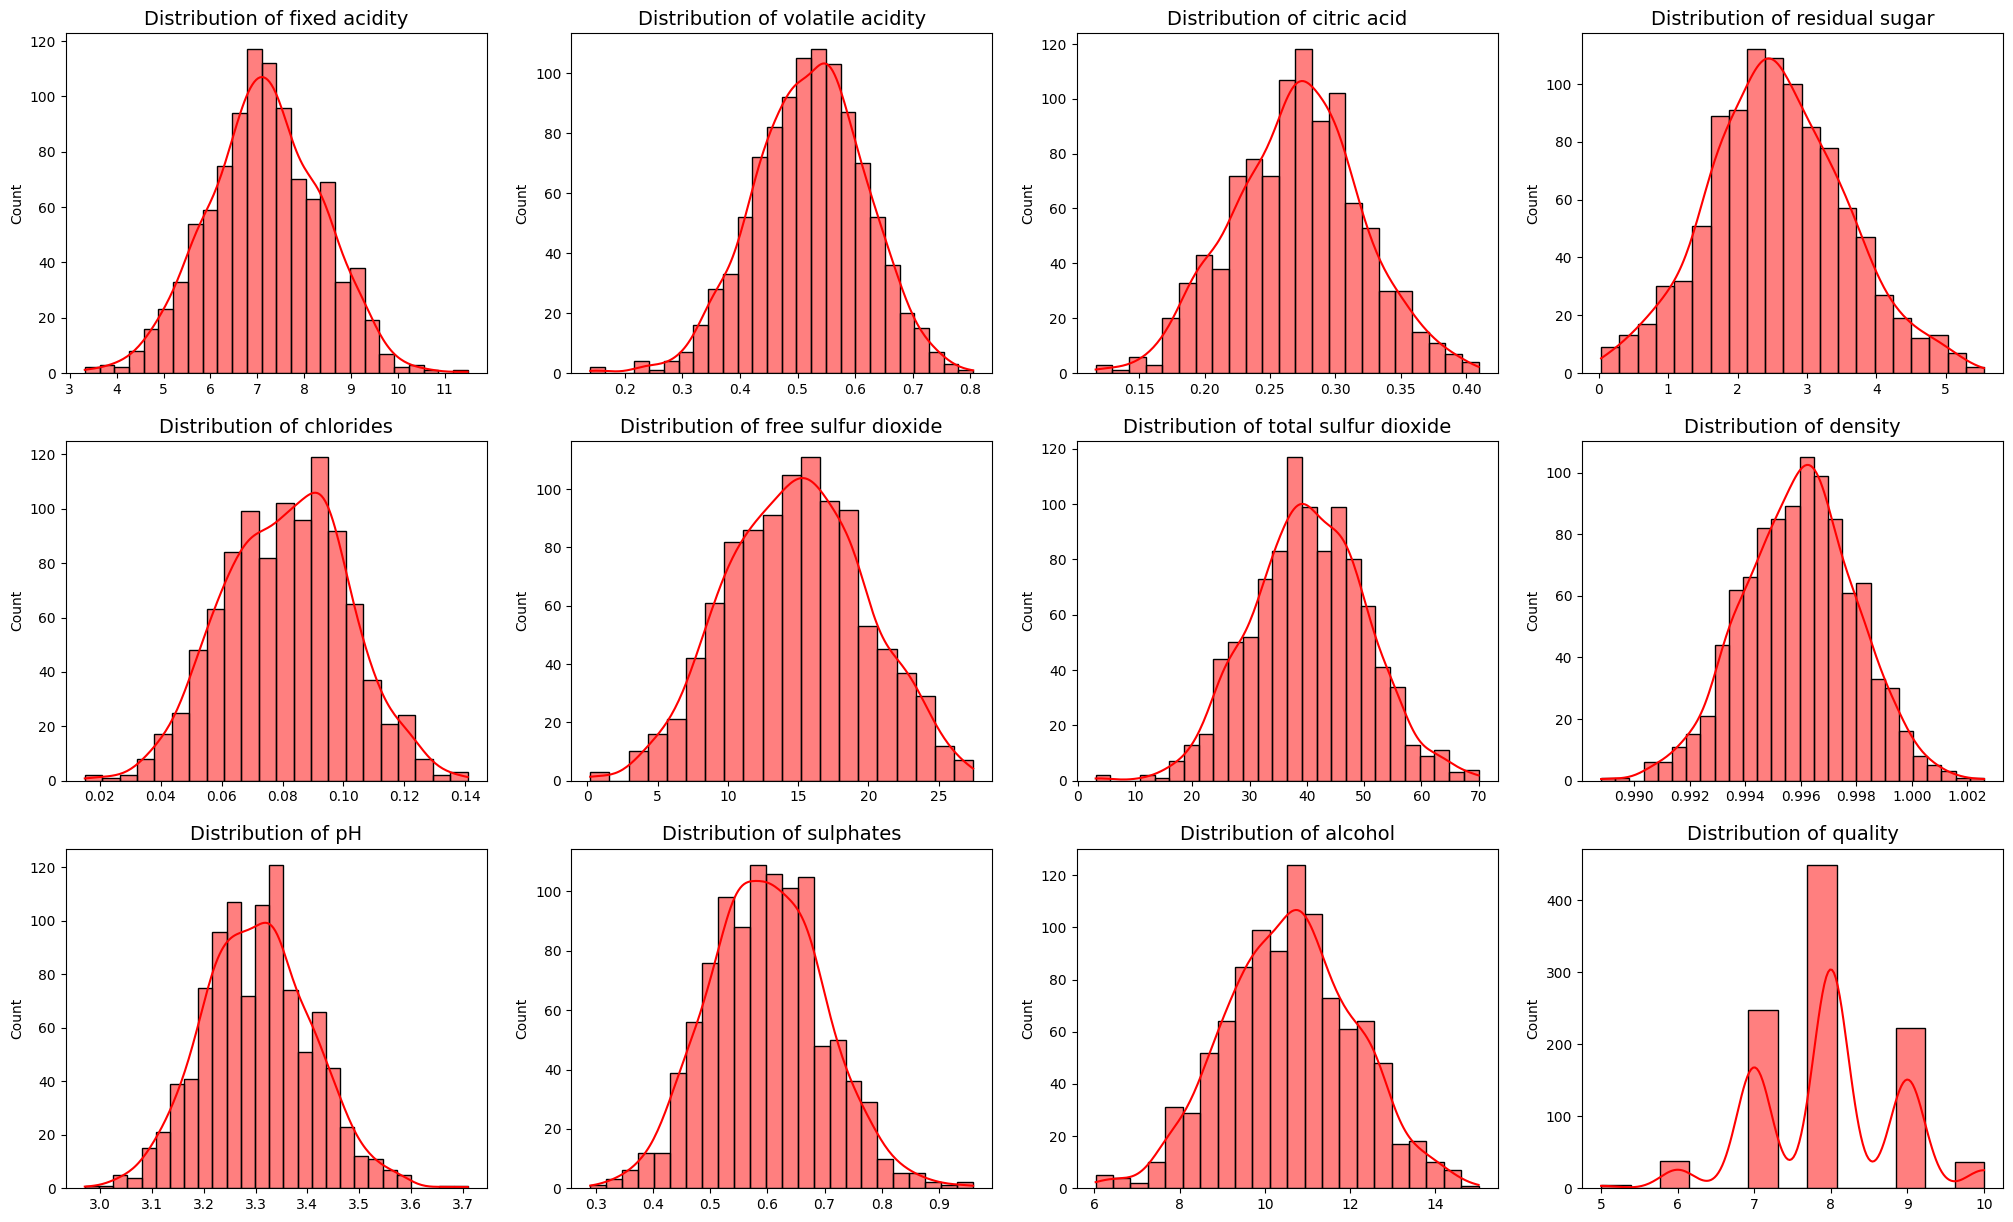

In [47]:
# Examine the distribution of each columns
# Create the subplot grid
fig, ax = plt.subplots(3, 4, figsize=(25, 15))

# Loop through the numerical columns
for i, col in enumerate(df.columns):
    sns.histplot(df[col].values, ax=ax[i // 4][i % 4], color='r', kde=True)
    ax[i // 4][i % 4].set_title(f'Distribution of {col}', fontsize=14)

plt.show()

`Explain distributions here`

### Boxplot

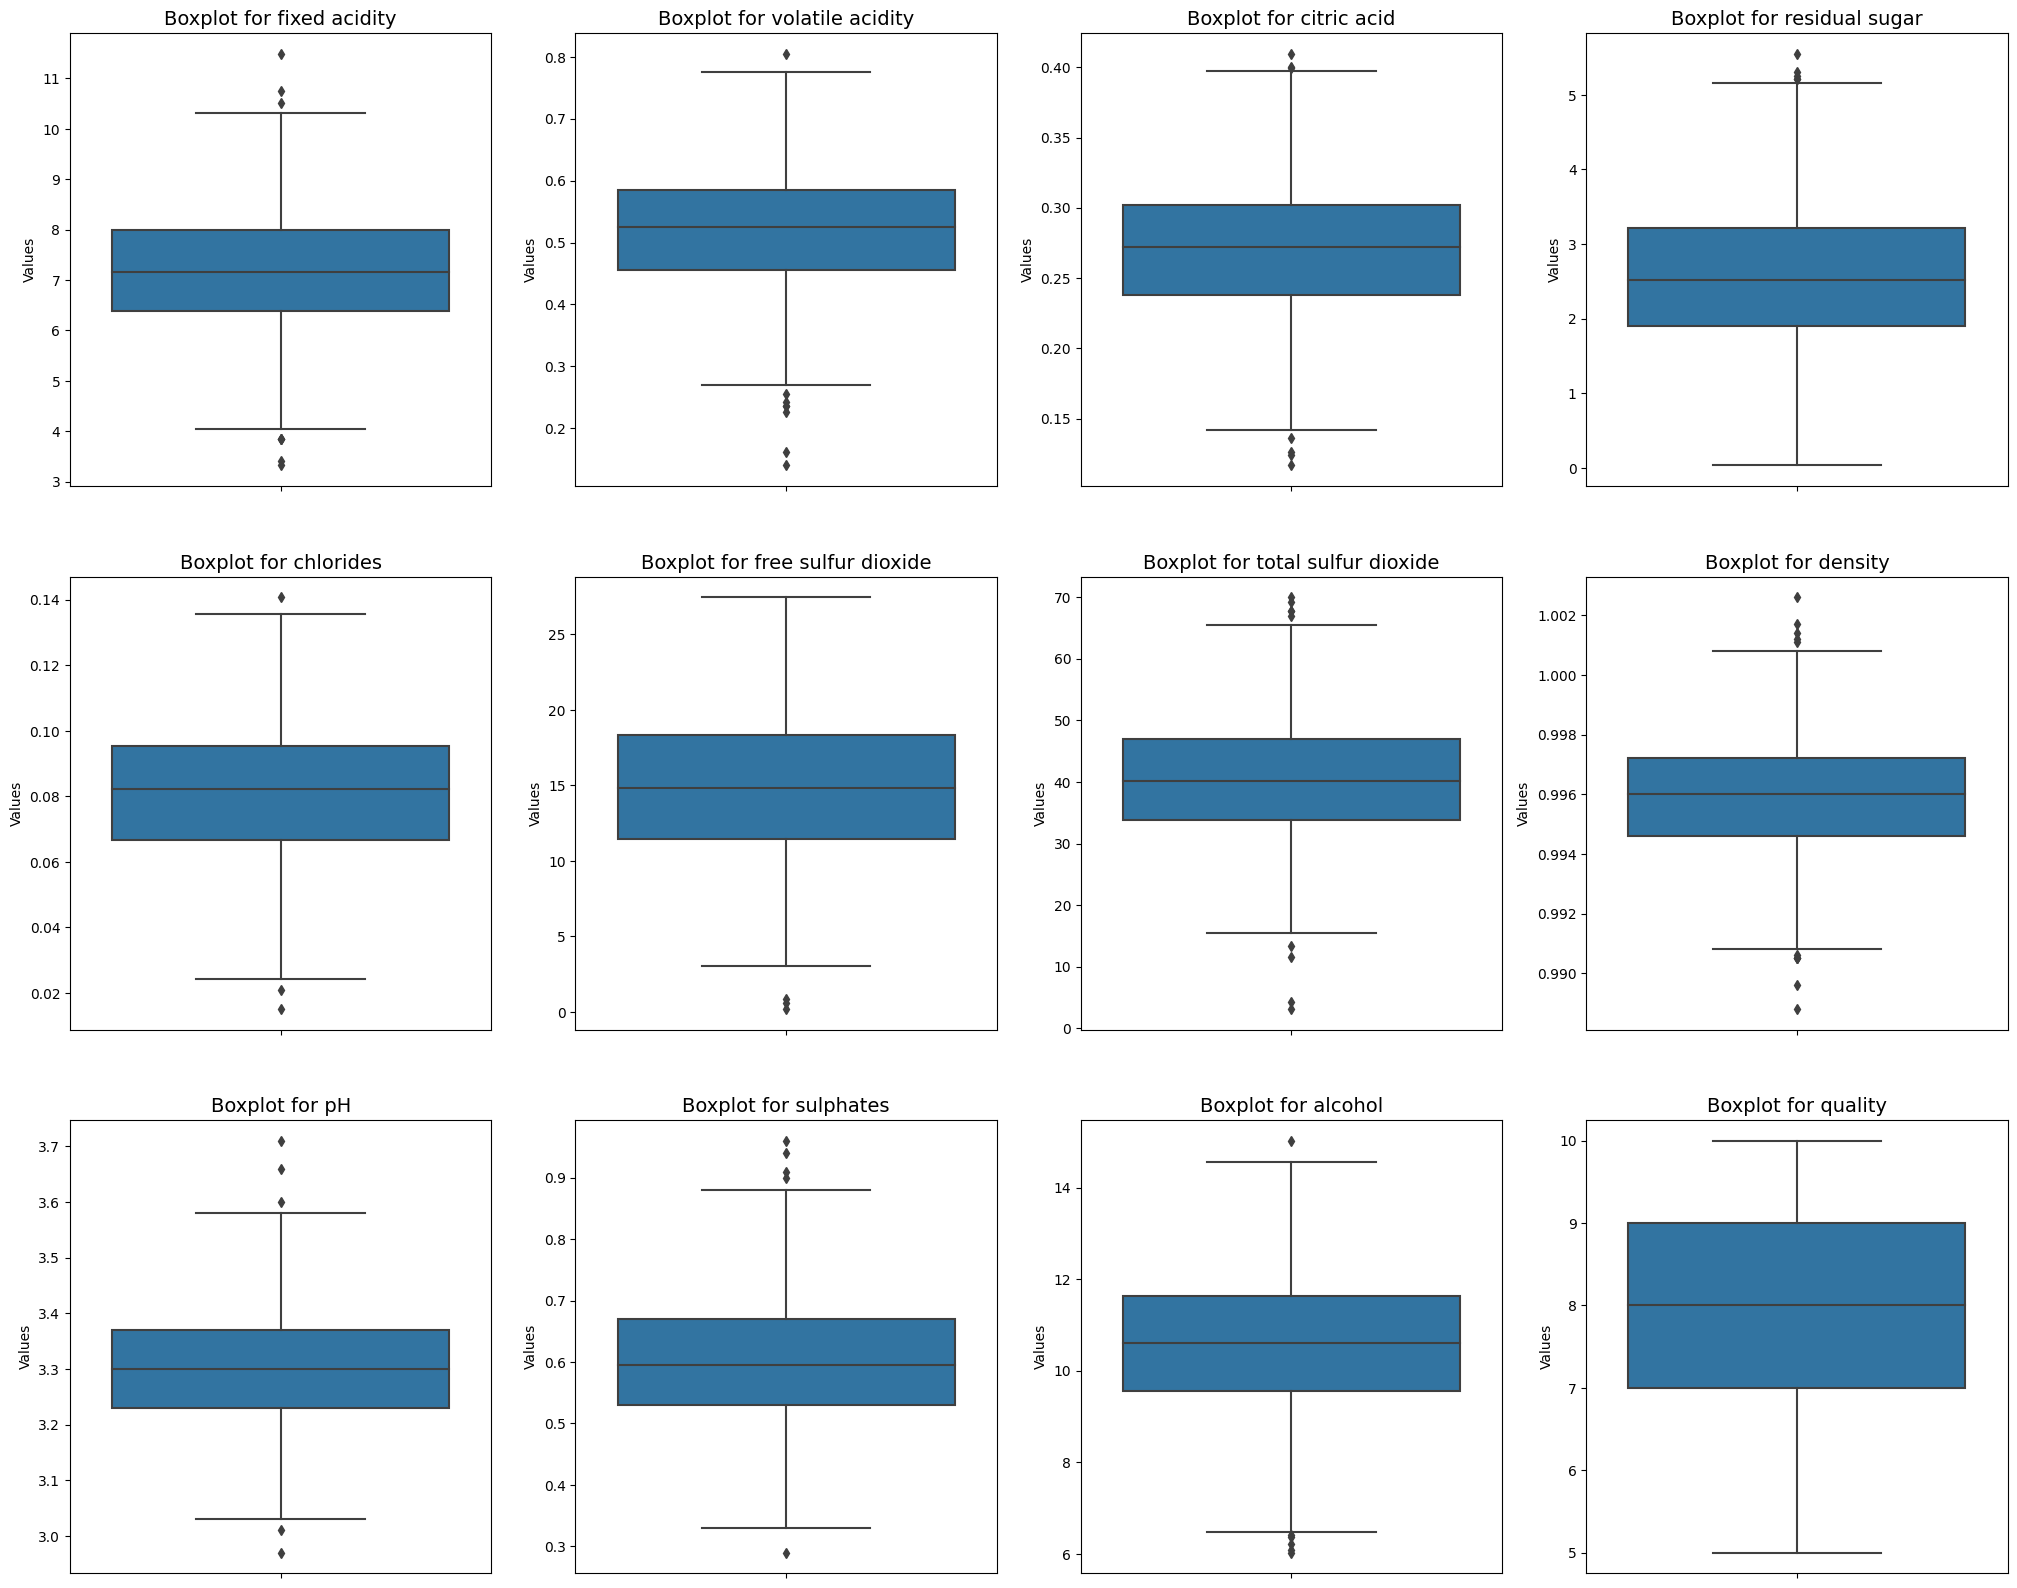

In [48]:
# Examine the boxplot of each columns
# Create the subplot grid
fig, ax = plt.subplots(3, 4, figsize=(25, 20))

# Loop through the numerical columns
for i, col in enumerate(df.columns):
    sns.boxplot(df[col].values, ax=ax[i // 4][i % 4])
    ax[i // 4][i % 4].set_title(f'Boxplot for {col}', fontsize=14)
    ax[i // 4][i % 4].set_ylabel('Values')
    ax[i // 4][i % 4].set_xticklabels('')

plt.show()

`Explain Boxplots Here`

### Quality Proportions

In [81]:
# Plot class distribution
def plot_classes(y):
    counts = y.value_counts().sort_index()
    counts = counts.rename_axis("Quality").reset_index(name="Count")
    fig = px.pie(counts, values="Quality", title="Quality Proportion Percentage", template="seaborn")
    fig.update_traces(textposition="inside", textinfo="value+percent+label")
    fig.show()
    print(counts)
    print()

In [82]:
plot_classes(df['quality'])

   Quality  Count
0        5      5
1        6     38
2        7    248
3        8    449
4        9    223
5       10     37



## Multivariate Analysis

### Feature Correlation

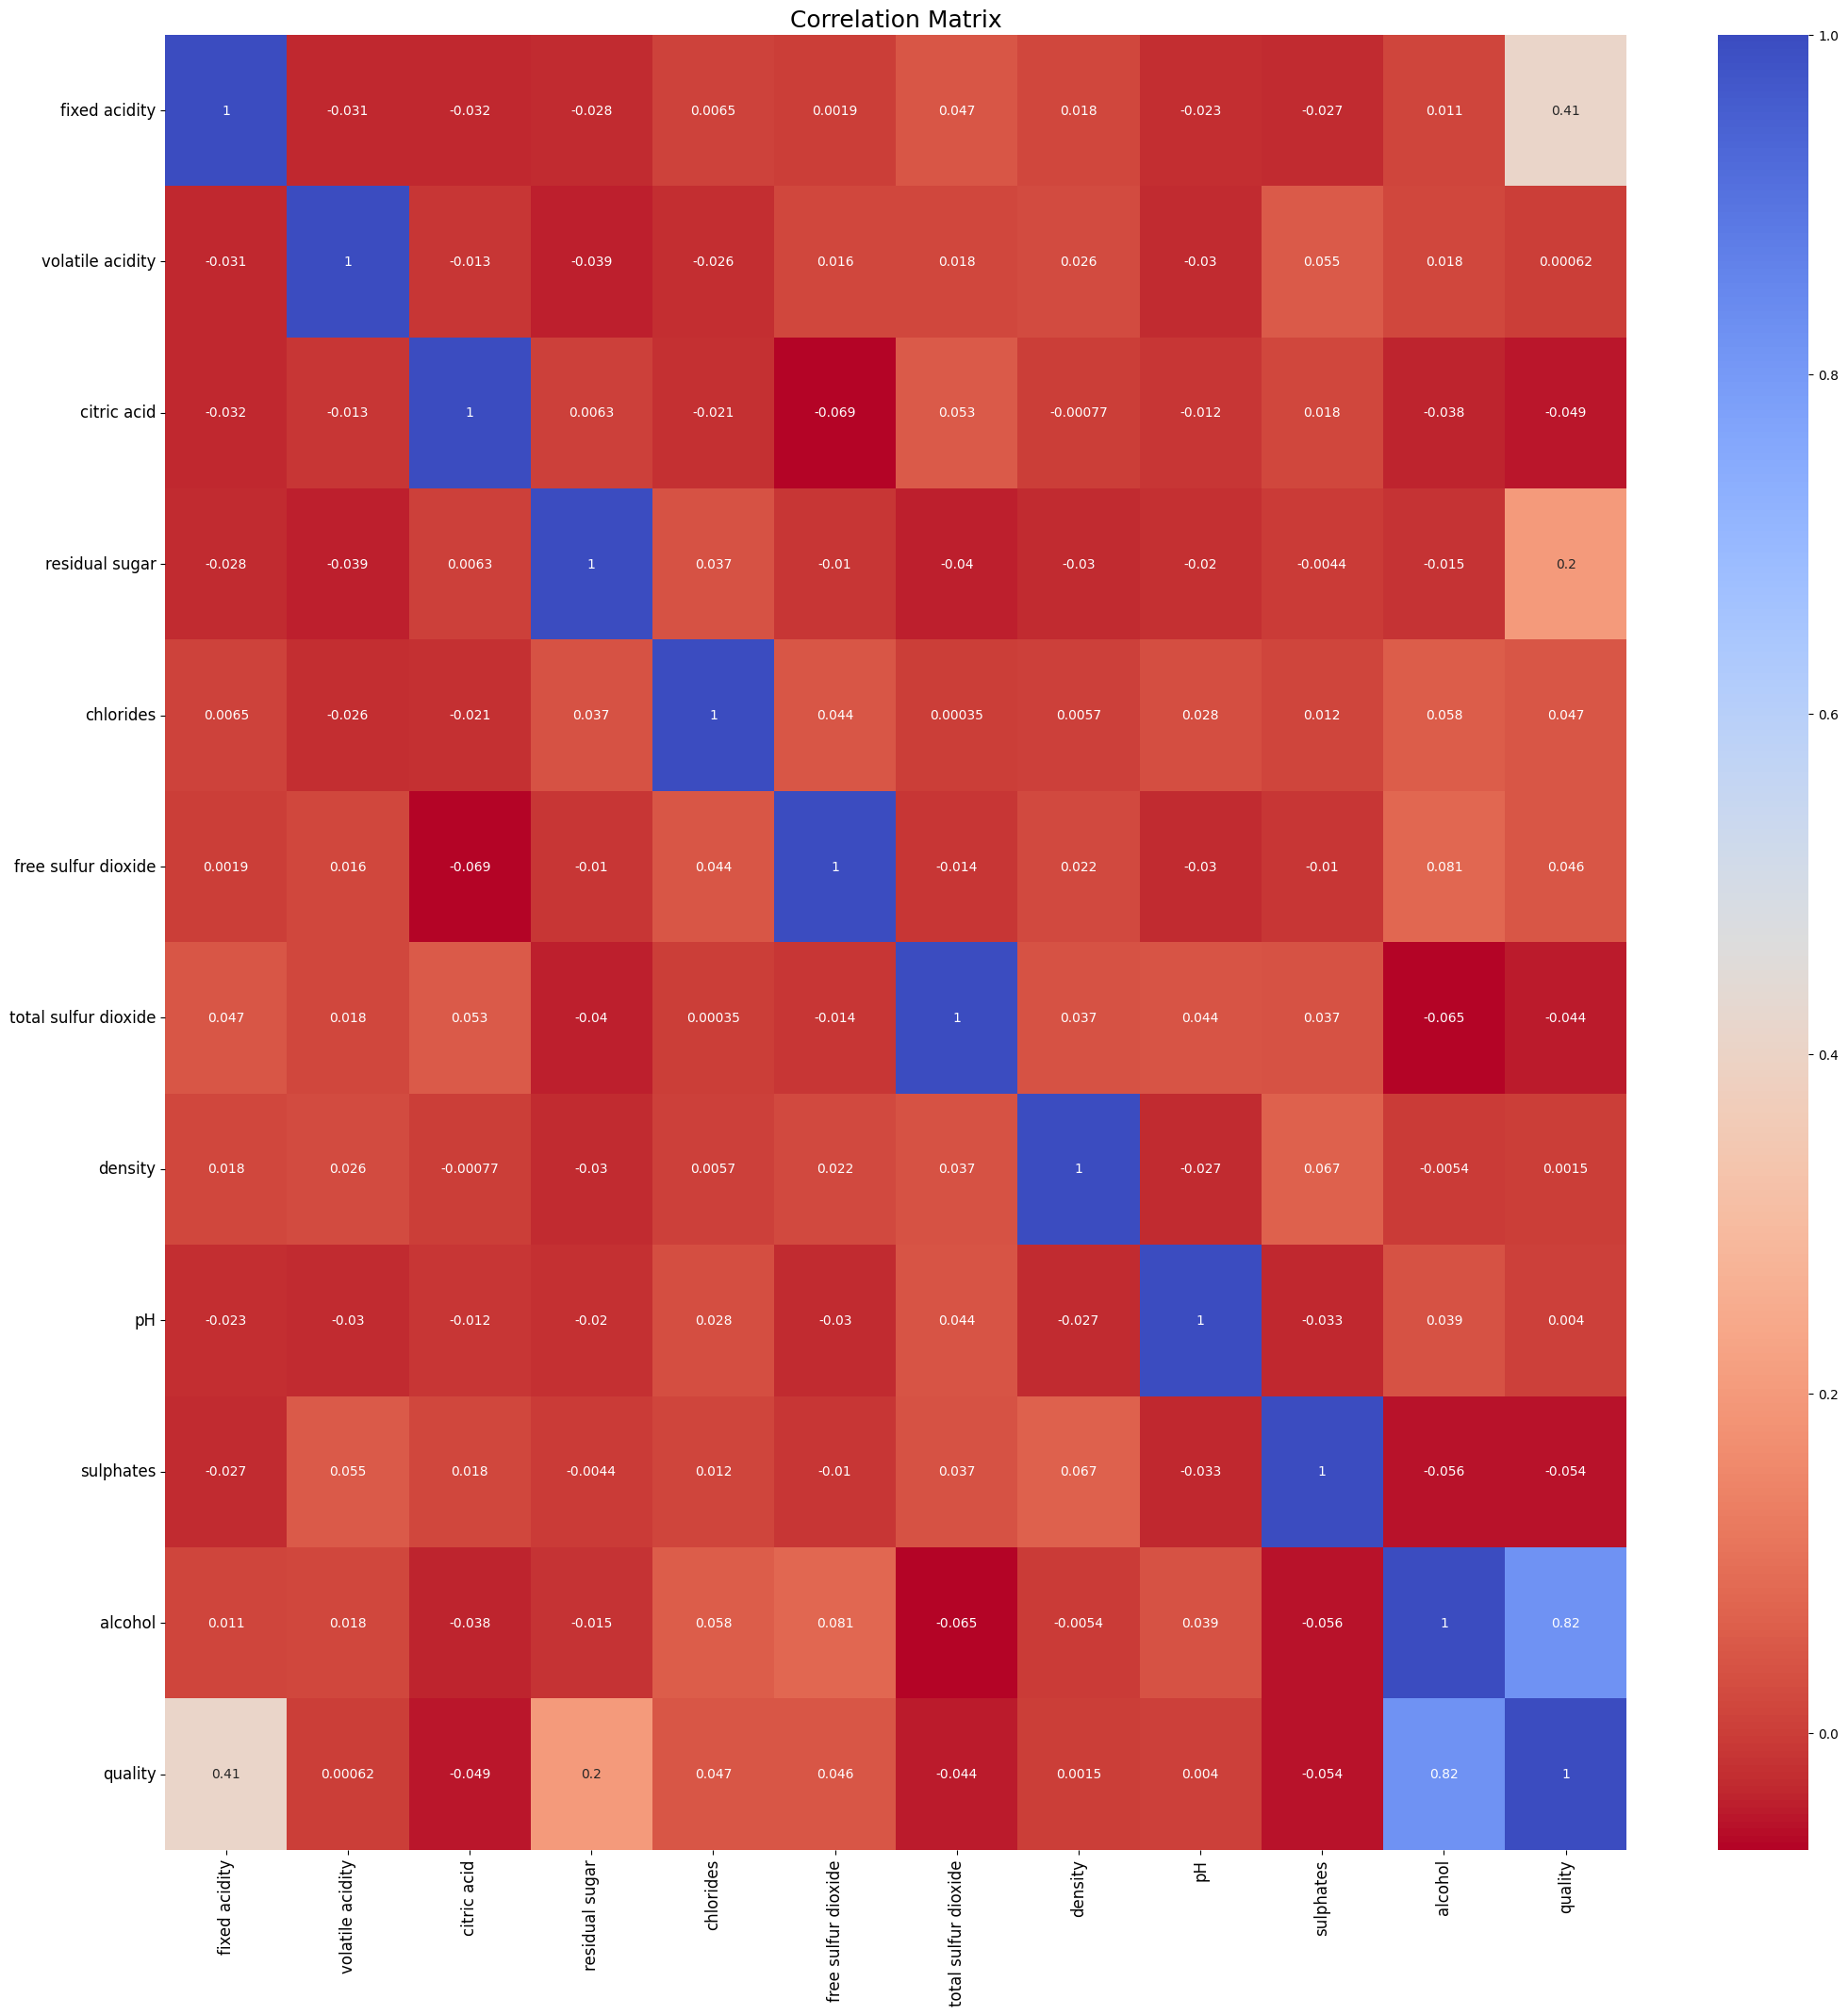

In [51]:
plt.figure(figsize = (25,25))
plt.title("Correlation Matrix", fontsize = 18)
sns.heatmap(df.corr(), cmap = 'coolwarm_r', annot = True)
plt.xticks(fontsize=12, rotation = 90)
plt.yticks(fontsize=12, rotation = 0)
plt.show()

# Hypothesis Testing

In [52]:
# Implement here